<a href="https://colab.research.google.com/github/09334677600f/Code-for-Chapter-4/blob/main/%D9%BE%DB%8C%D8%B4_%D9%BE%D8%B1%D8%AF%D8%A7%D8%B2%D8%B4_%D9%88_%D8%AA%D9%88%D8%B5%DB%8C%D9%81_%D8%AF%D8%A7%D8%AF%D9%87_%D9%87%D8%A7_(%D8%A8%D8%AE%D8%B4_%D8%A7%D9%88%D9%84_%D9%BE%DB%8C%D8%B4%E2%80%8C%D9%BE%D8%B1%D8%AF%D8%A7%D8%B2%D8%B4_%D8%AF%D8%A7%D8%AF%D9%87_%D9%87%D8%A7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install jdatetime

In [ ]:
import pandas as pd
import jdatetime

In [ ]:
df = pd.read_excel("/content/96.xlsx")

In [ ]:
# =========================
# گام 1: بررسی تعداد داده‌های گمشده در کل داده
# =========================
missing_summary = df.isna().sum()
print("تعداد داده‌های گمشده در هر ستون:")
print(missing_summary)

print("\nتعداد کل داده‌های گمشده:", df.isna().sum().sum())

تعداد داده‌های گمشده در هر ستون:
ID                            0
Accident_ID                   0
تعداد تصادف                   0
تاریخ                         0
جنسیت                      2900
زمان تماس                  2652
ساعت رسیدن به محل حادثه    6243
سن بیمار                   1422
dtype: int64

تعداد کل داده‌های گمشده: 13217


In [ ]:
# =========================
# گام 2: پر کردن ستون جنسیت
# - شمارش 'نامشخص'
# - محاسبه مد
# - جایگزینی نامشخص و NaN با مد
# =========================

# محاسبه مد ستون جنسیت (بدون در نظر گرفتن 'نامشخص' و NaN)
mode_gender = df.loc[
    (df['جنسیت'].notna()) & (df['جنسیت'] != 'نامشخص'),
    'جنسیت'
].mode()[0]

# شمارش تعداد نامشخص
num_unknown_gender = (df['جنسیت'] == 'نامشخص').sum()
print("\nتعداد 'نامشخص' در ستون جنسیت:", num_unknown_gender)

# جایگزینی 'نامشخص' با مد
df['جنسیت'] = df['جنسیت'].replace('نامشخص', mode_gender)

# جایگزینی مقادیر NaN با مد
df['جنسیت'] = df['جنسیت'].fillna(mode_gender)

print("مد ستون جنسیت:", mode_gender)


تعداد 'نامشخص' در ستون جنسیت: 1656
مد ستون جنسیت: مذکر


In [ ]:
# =========================
# اصلاح سن بیمار (بازه معتبر 1 تا 95 سال)
# =========================

# محاسبه میانگین سن‌های معتبر
mean_age = df.loc[
    (df['سن بیمار'] >= 1) & (df['سن بیمار'] <= 95),
    'سن بیمار'
].mean()

# پر کردن داده‌های گمشده با میانگین
df['سن بیمار'] = df['سن بیمار'].fillna(mean_age)

# جایگزینی سن‌های نامعتبر (کمتر از 1 یا بیشتر از 95) با میانگین
df.loc[
    (df['سن بیمار'] < 1) | (df['سن بیمار'] > 95),
    'سن بیمار'
] = mean_age

print("میانگین سن بیمار (محاسبه‌شده از بازه معتبر 1 تا 95 سال):", mean_age)


میانگین سن بیمار (محاسبه‌شده از بازه معتبر 1 تا 95 سال): 30.02517985611511


In [ ]:
# =========================
# اصلاح سن بیمار
# =========================

# محاسبه میانگین سن‌های معتبر (سن >= 1 سال)
mean_age = df.loc[df['سن بیمار'] >= 1, 'سن بیمار'].mean()

# پر کردن داده‌های گمشده با میانگین
df['سن بیمار'] = df['سن بیمار'].fillna(mean_age)

# جایگزینی سن‌های صفر و منفی با میانگین
df.loc[df['سن بیمار'] < 1, 'سن بیمار'] = mean_age

print("میانگین سن بیمار (محاسبه‌شده از سن‌های معتبر ≥ ۱ سال):", mean_age)


میانگین سن بیمار (محاسبه‌شده از سن‌های معتبر ≥ ۱ سال): 30.10504077094144


In [ ]:
# =========================
# گام 4: حذف داده‌های گمشده در سایر ستون‌ها
# =========================

df_before = len(df)
df = df.dropna()
df_after = len(df)

print("\nتعداد ردیف‌ها قبل از حذف نهایی:", df_before)
print("تعداد ردیف‌ها بعد از حذف نهایی:", df_after)
print("تعداد ردیف‌های حذف‌شده:", df_before - df_after)


تعداد ردیف‌ها قبل از حذف نهایی: 28507
تعداد ردیف‌ها بعد از حذف نهایی: 22264
تعداد ردیف‌های حذف‌شده: 6243


In [ ]:
missing_summary = df.isna().sum()
print("تعداد داده‌های گمشده در هر ستون:")
print(missing_summary)

تعداد داده‌های گمشده در هر ستون:
ID                         0
Accident_ID                0
تعداد تصادف                0
تاریخ                      0
جنسیت                      0
زمان تماس                  0
ساعت رسیدن به محل حادثه    0
سن بیمار                   0
dtype: int64


In [ ]:
# =========================
# گام 5: ذخیره در فایل اکسل
# =========================

output_path = "cleaned_dataset.xlsx"
df.to_excel(output_path, index=False)

print("\n✅ فایل نهایی ذخیره شد در مسیر:", output_path)


✅ فایل نهایی ذخیره شد در مسیر: cleaned_dataset.xlsx


In [ ]:
df = pd.read_excel("/content/cleaned_dataset.xlsx")

In [ ]:
import pandas as pd
import numpy as np
# ---------------------------
# 2. تبدیل ستون‌های زمانی به datetime
# ---------------------------

# تبدیل به datetime (فقط ساعت)
df['زمان تماس'] = pd.to_datetime(df['زمان تماس'], format='%H:%M:%S')
df['ساعت رسیدن به محل حادثه'] = pd.to_datetime(df['ساعت رسیدن به محل حادثه'], format='%H:%M:%S')

# اصلاح عبور از نیمه‌شب
df.loc[
    df['ساعت رسیدن به محل حادثه'] < df['زمان تماس'],
    'ساعت رسیدن به محل حادثه'
] += pd.Timedelta(days=1)
# ---------------------------
# 3. ایجاد متغیر مدت زمان (بر حسب دقیقه)
# ---------------------------
# محاسبه مدت زمان (دقیقه)
df['مدت زمان'] = (
    df['ساعت رسیدن به محل حادثه'] - df['زمان تماس']
).dt.total_seconds() / 60


In [ ]:
# تعداد مدت‌زمان‌های کمتر از 1 دقیقه
count_lt_1 = (df['مدت زمان'] < 1).sum()

# تعداد مدت‌زمان‌های بیشتر از 120 دقیقه
count_gt_120 = (df['مدت زمان'] > 120).sum()

print("🔻 تعداد مدت زمان‌های کمتر از 1 دقیقه:", count_lt_1)
print("🔺 تعداد مدت زمان‌های بیشتر از 120 دقیقه:", count_gt_120)


🔻 تعداد مدت زمان‌های کمتر از 1 دقیقه: 130
🔺 تعداد مدت زمان‌های بیشتر از 120 دقیقه: 31


In [ ]:
# ---------------------------
# 3. حذف مدت زمان‌های نامعتبر
# ---------------------------
df = df[(df['مدت زمان'] >= 1) & (df['مدت زمان'] <= 120)]

print("🔢 تعداد داده‌ها پس از فیلتر مدت زمان:", df.shape[0])


🔢 تعداد داده‌ها پس از فیلتر مدت زمان: 22103


In [ ]:
# ---------------------------
# 4. ایجاد متغیر وضعیت (Status)
# 1 = غیرسانسور (<= 8 دقیقه)
# 0 = سانسور (> 8 دقیقه)
# ---------------------------
df['وضعیت'] = (df['مدت زمان'] <= 8).astype(int)

# بررسی سریع
print(df['وضعیت'].value_counts())


وضعیت
0    14497
1     7606
Name: count, dtype: int64


In [ ]:
# ---------------------------
# 4. ایجاد متغیر زمان شب/روز
# ---------------------------
def get_day_night(time):
    hour = time.hour
    return 'روز' if 6 <= hour < 18 else 'شب'

df['زمان شب و روز'] = df['زمان تماس'].apply(get_day_night)

In [ ]:
# ---------------------------
# 5. ایجاد متغیر ساعت اوج ترافیک
# ---------------------------
def get_peak_traffic(time):
    hour = time.hour
    return 'اوج ترافیک' if (7 <= hour < 9) or (17 <= hour < 19) else 'خارج از اوج'

df['ساعت اوج ترافیک'] = df['زمان تماس'].apply(get_peak_traffic)

In [ ]:
# ---------------------------
# 6. ایجاد متغیر نوع روز (اول هفته / آخر هفته)
# ---------------------------
def get_weekday(persian_date):
    year, month, day = map(int, persian_date.split("/"))
    gregorian_date = jdatetime.date(year, month, day).togregorian()
    weekday = gregorian_date.weekday()  # دوشنبه=0
    persian_weekday = (weekday + 2) % 7  # شنبه=0
    return persian_weekday

def classify_day(weekday):
    return "اول هفته" if weekday in [0,1,2,3,4] else "آخر هفته"

df['روز هفته'] = df['تاریخ'].apply(get_weekday)
df['نوع روز'] = df['روز هفته'].apply(classify_day)
df = df.drop(columns=['روز هفته'])

In [ ]:
# ---------------------------
# 7. ایجاد متغیر فصل
# ---------------------------
def get_season(persian_date):
    year, month, day = map(int, persian_date.split("/"))
    if month in [1,2,3]: return "بهار"
    elif month in [4,5,6]: return "تابستان"
    elif month in [7,8,9]: return "پاییز"
    elif month in [10,11,12]: return "زمستان"
    else: return "نامشخص"

df['فصل'] = df['تاریخ'].apply(get_season)

In [ ]:
count_unknown_season = (df['فصل'] == 'نامشخص').sum()
print("تعداد موارد نامشخص در ستون فصل:", count_unknown_season)

تعداد موارد نامشخص در ستون فصل: 0


In [ ]:
print(df['فصل'].value_counts())

فصل
تابستان    8344
پاییز      6687
زمستان     5530
بهار       1703
Name: count, dtype: int64


In [ ]:
# ---------------------------
# 8. ذخیره داده نهایی
# ---------------------------
output_path = "final_file1.xlsx"
df.to_excel(output_path, index=False, engine='openpyxl')

print("✅ فایل نهایی تحلیل بقا ذخیره شد")
print("📁 مسیر فایل:", output_path)


✅ فایل نهایی تحلیل بقا ذخیره شد
📁 مسیر فایل: final_file1.xlsx


In [ ]:
df = pd.read_excel("/content/final_file1.xlsx")

In [ ]:
#بررسی داده پرت با نمودار جعبه ای برای متغیرهای عددی

In [ ]:
import matplotlib.pyplot as plt

# ایجاد شکل
plt.figure(figsize=(6, 4))

# رسم نمودار جعبه‌ای (بدون حذف داده‌های گمشده)
plt.boxplot(df['سن بیمار'], vert=True)

# برچسب‌ها
plt.ylabel('سن بیمار (سال)')
plt.title('نمودار جعبه‌ای سن بیمار برای بررسی داده‌های پرت')

# ذخیره فایل
plt.savefig('boxplot_sen_bimar.png', dpi=300, bbox_inches='tight')

# بستن شکل (خیلی مهم در Colab)
plt.close()

print("نمودار با موفقیت ذخیره شد: boxplot_sen_bimar.png")

نمودار با موفقیت ذخیره شد: boxplot_sen_bimar.png


In [ ]:
import matplotlib.pyplot as plt

# ایجاد شکل
plt.figure(figsize=(6, 4))

# رسم نمودار جعبه‌ای
plt.boxplot(df['مدت زمان'], vert=True)

# برچسب‌ها
plt.ylabel('مدت زمان پاسخگویی (دقیقه)')
plt.title('نمودار جعبه‌ای مدت زمان پاسخگویی اورژانس')

# ذخیره نمودار
plt.savefig('boxplot_modat_zaman.png', dpi=300, bbox_inches='tight')

# بستن شکل (مهم برای جلوگیری از خطا در Colab)
plt.close()

print("نمودار ذخیره شد: boxplot_modat_zaman.png")

نمودار ذخیره شد: boxplot_modat_zaman.png


In [ ]:
import numpy as np

x = df['مدت زمان']

# محاسبه چارک‌ها
Q1 = np.percentile(x, 25)
Q3 = np.percentile(x, 75)
IQR = Q3 - Q1

# حدود داده پرت
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# شناسایی داده‌های پرت
outliers = x[(x < lower_bound) | (x > upper_bound)]

print("حد پایین:", lower_bound)
print("حد بالا:", upper_bound)
print("تعداد داده‌های پرت:", outliers.shape[0])

حد پایین: -2.173249999999995
حد بالا: 22.422083333333326
تعداد داده‌های پرت: 1178


In [ ]:
import numpy as np

age = df['سن بیمار']

# محاسبه چارک‌ها
Q1 = np.percentile(age, 25)
Q3 = np.percentile(age, 75)
IQR = Q3 - Q1

# حدود داده پرت
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# شناسایی داده‌های پرت
age_outliers = age[(age < lower_bound) | (age > upper_bound)]

print("حد پایین سن (Boxplot):", lower_bound)
print("حد بالای سن (Boxplot):", upper_bound)
print("تعداد داده‌های پرت سن بیمار:", age_outliers.shape[0])

حد پایین سن (Boxplot): -7.0
حد بالای سن (Boxplot): 65.0
تعداد داده‌های پرت سن بیمار: 748


In [ ]:
#به داده پرت کاری نداریم (تعداد داده های پرت کم هستند.)

In [ ]:
import pandas as pd

# فرض: داده نهایی شما در DataFrame به نام df است
# و ستون مدت زمان پاسخگویی نامش 'مدت_زمان' (بر حسب دقیقه) است

# 1. ایجاد متغیر وضعیت (Status)
df['وضعیت'] = (df['مدت زمان'] <= 8).astype(int)

# 2. بررسی سریع
print(df['وضعیت'].value_counts())

# 3. ذخیره داده نهایی در فایل اکسل
output_path = "final_survival_dataset1.xlsx"
df.to_excel(output_path, index=False)

print("فایل نهایی تحلیل بقا ذخیره شد در مسیر:", output_path)

وضعیت
0    14528
1     7736
Name: count, dtype: int64
فایل نهایی تحلیل بقا ذخیره شد در مسیر: final_survival_dataset1.xlsx


In [ ]:
df = pd.read_excel("/content/final_survival_dataset1.xlsx")

In [ ]:
import pandas as pd

# انتخاب ستون مدت زمان
duration = df['مدت زمان']

# -------------------------
# آمار توصیفی
# -------------------------
print("آمار توصیفی ستون مدت زمان:")
print(duration.describe())

# -------------------------
# چندک‌ها (به‌صورت صریح)
# -------------------------
quantiles = duration.quantile([0.25, 0.5, 0.75])
print("\nچندک‌ها:")
print(quantiles)

# -------------------------
# مینیمم، ماکسیمم و میانگین
# -------------------------
print("\nمینیمم:", duration.min())
print("ماکسیمم:", duration.max())
print("میانگین:", duration.mean())

# -------------------------
# شمارش بر اساس آستانه 0.5 دقیقه
# -------------------------
count_above_05 = (duration > 0.5).sum()
count_below_equal_05 = (duration <= 0.5).sum()

print("\nتعداد مدت زمان‌ها > 0.5 دقیقه:", count_above_05)
print("تعداد مدت زمان‌ها ≤ 0.5 دقیقه:", count_below_equal_05)

آمار توصیفی ستون مدت زمان:
count    22264.000000
mean        12.304658
std         39.335484
min          0.033333
25%          7.018675
50%          9.600000
75%         13.183333
max       1438.716667
Name: مدت زمان, dtype: float64

چندک‌ها:
0.25     7.018675
0.50     9.600000
0.75    13.183333
Name: مدت زمان, dtype: float64

مینیمم: 0.03333333333333333
ماکسیمم: 1438.716666666667
میانگین: 12.304657536082164

تعداد مدت زمان‌ها > 0.5 دقیقه: 22197
تعداد مدت زمان‌ها ≤ 0.5 دقیقه: 67


In [ ]:
count_over_57 = (df['مدت زمان'] > 57).sum()
print("تعداد مدت زمان‌های بیشتر از ۵۷ دقیقه:", count_over_57)

تعداد مدت زمان‌های بیشتر از ۵۷ دقیقه: 86


In [ ]:
import pandas as pd

# تنظیم برای نمایش کامل همه مقادیر
pd.set_option('display.max_rows', None)

# استخراج فقط مقادیر مدت زمان
durations_over_57 = df.loc[df['مدت زمان'] > 57, 'مدت زمان']

print("مقادیر مدت زمان بیشتر از ۵۷ دقیقه:")
print(durations_over_57)

print("\nتعداد کل:", durations_over_57.shape[0])

# بازگرداندن تنظیمات به حالت پیش‌فرض (اختیاری)
pd.reset_option('display.max_rows')

مقادیر مدت زمان بیشتر از ۵۷ دقیقه:
172        57.933333
173        57.933333
2224       73.600000
2536     1436.050000
2605     1389.900000
2638     1435.500000
2653     1435.266667
2654     1435.266667
2655     1435.266667
2835     1438.716667
2839     1438.383333
2840     1438.383333
2938       68.016667
3060       72.416667
3071     1392.466667
3668      101.866667
3813     1391.150000
3814     1391.150000
3815     1391.150000
4099      252.516667
4529       73.700000
5018       85.050000
5046      455.733333
5049     1036.683333
5050     1015.350000
5053      455.466667
5054      455.466667
5055      455.466667
5056      444.866667
5057      444.866667
5058      444.866667
5090       61.083333
5091       61.083333
5187     1393.233333
5191     1387.750000
5192       81.350000
5422       61.016667
5423      141.583333
5424       61.016667
5425       61.016667
5651       57.666667
5940      112.366667
6510      174.633333
6726      418.316667
7422       69.566667
7423       69.566667

In [ ]:
import pandas as pd

# تنظیم برای نمایش کامل همه ردیف‌ها
pd.set_option('display.max_rows', None)

# استخراج فقط مقادیر مدت زمان بیشتر از 120 دقیقه
durations_over_120 = df.loc[df['مدت زمان'] > 120, 'مدت زمان']

print("مقادیر مدت زمان بیشتر از ۱۲۰ دقیقه:")
print(durations_over_120)

print("\nتعداد کل:", durations_over_120.shape[0])

# بازگرداندن تنظیمات به حالت پیش‌فرض (اختیاری)
pd.reset_option('display.max_rows')


مقادیر مدت زمان بیشتر از ۱۲۰ دقیقه:
2536     1436.050000
2605     1389.900000
2638     1435.500000
2653     1435.266667
2654     1435.266667
2655     1435.266667
2835     1438.716667
2839     1438.383333
2840     1438.383333
3071     1392.466667
3813     1391.150000
3814     1391.150000
3815     1391.150000
4099      252.516667
5046      455.733333
5049     1036.683333
5050     1015.350000
5053      455.466667
5054      455.466667
5055      455.466667
5056      444.866667
5057      444.866667
5058      444.866667
5187     1393.233333
5191     1387.750000
5423      141.583333
6510      174.633333
6726      418.316667
20756     226.139283
20757     226.139283
20758     226.139283
Name: مدت زمان, dtype: float64

تعداد کل: 31


In [ ]:
import pandas as pd

# فرض: DataFrame شما df است
# و نام ستون مدت زمان 'مدت_زمان' (بر حسب دقیقه) می‌باشد

count_less_than_1min = (df['مدت زمان'] < 1).sum()

print(f"تعداد رکوردهایی که مدت زمان آن‌ها کمتر از ۱ دقیقه است: {count_less_than_1min}")

تعداد رکوردهایی که مدت زمان آن‌ها کمتر از ۱ دقیقه است: 130


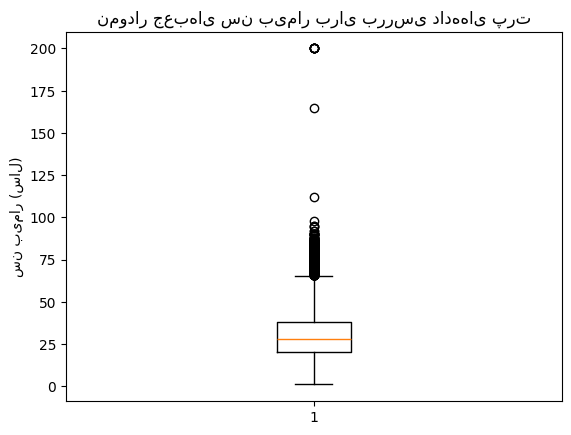

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(df['سن بیمار'])
plt.ylabel('سن بیمار (سال)')
plt.title('نمودار جعبه‌ای سن بیمار برای بررسی داده‌های پرت')
plt.show()


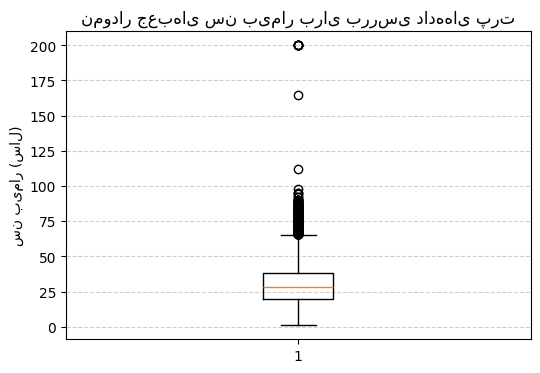

In [ ]:
import matplotlib.pyplot as plt

# اطمینان از اینکه نمودار نمایش داده می‌شود
plt.figure(figsize=(6, 4))

plt.boxplot(df['سن بیمار'], vert=True)

plt.ylabel('سن بیمار (سال)')
plt.title('نمودار جعبه‌ای سن بیمار برای بررسی داده‌های پرت')

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


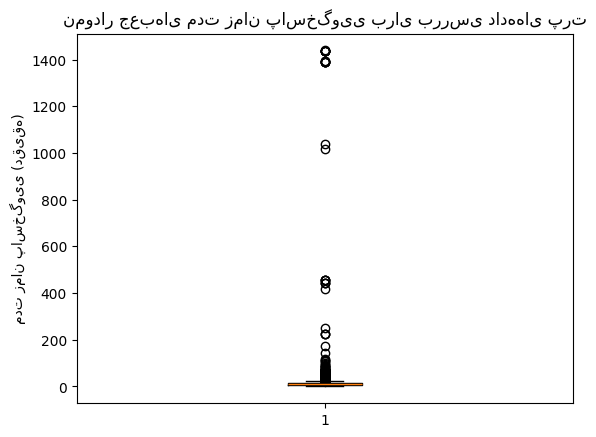

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(df['مدت زمان'])
plt.ylabel('مدت زمان پاسخگویی (دقیقه)')
plt.title('نمودار جعبه‌ای مدت زمان پاسخگویی برای بررسی داده‌های پرت')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# ایجاد شکل
plt.figure(figsize=(6, 4))

# رسم نمودار جعبه‌ای (بدون حذف داده‌های گمشده)
plt.boxplot(df['سن بیمار'], vert=True)

# برچسب‌ها
plt.ylabel('سن بیمار (سال)')
plt.title('نمودار جعبه‌ای سن بیمار برای بررسی داده‌های پرت')

# ذخیره فایل
plt.savefig('boxplot_sen_bimar.png', dpi=300, bbox_inches='tight')

# بستن شکل (خیلی مهم در Colab)
plt.close()

print("نمودار با موفقیت ذخیره شد: boxplot_sen_bimar.png")


نمودار با موفقیت ذخیره شد: boxplot_sen_bimar.png


In [ ]:
import matplotlib.pyplot as plt

# ایجاد شکل
plt.figure(figsize=(6, 4))

# رسم نمودار جعبه‌ای
plt.boxplot(df['مدت زمان'], vert=True)

# برچسب‌ها
plt.ylabel('مدت زمان پاسخگویی (دقیقه)')
plt.title('نمودار جعبه‌ای مدت زمان پاسخگویی اورژانس')

# ذخیره نمودار
plt.savefig('boxplot_modat_zaman.png', dpi=300, bbox_inches='tight')

# بستن شکل (مهم برای جلوگیری از خطا در Colab)
plt.close()

print("نمودار ذخیره شد: boxplot_modat_zaman.png")


نمودار ذخیره شد: boxplot_modat_zaman.png


In [ ]:
count_over_95 = (df['سن بیمار'] > 95).sum()
print("تعداد سن بیمار بالای 95 سال:", count_over_95)

تعداد سن بیمار بالای 95 سال: 0


In [ ]:
count_over_100 = (df['سن بیمار'] > 100).sum()
print("تعداد سن بیمار بالای 100 سال:", count_over_100)

تعداد سن بیمار بالای 100 سال: 0


In [ ]:
import pandas as pd

# تنظیم برای نمایش کامل همه ردیف‌ها
pd.set_option('display.max_rows', None)

# استخراج فقط مقادیر مدت زمان بیشتر از 120 دقیقه
durations_over_120 = df.loc[df['سن بیمار'] > 95, "سن بیمار"]

print("مقادیر مدت زمان بیشتر از ۱۲۰ دقیقه:")
print(durations_over_120)

print("\nتعداد کل:", durations_over_120.shape[0])

# بازگرداندن تنظیمات به حالت پیش‌فرض (اختیاری)
pd.reset_option('display.max_rows')


مقادیر مدت زمان بیشتر از ۱۲۰ دقیقه:
2291     112.0
3799     200.0
4473     200.0
4523     200.0
4763     200.0
4910     200.0
5859     200.0
6157     200.0
7299     165.0
14517     98.0
Name: سن بیمار, dtype: float64

تعداد کل: 10


In [ ]:
# آمار توصیفی سن بیمار
age_desc = df['سن بیمار'].describe()

print("آمار توصیفی ستون سن بیمار:")
print(age_desc)


آمار توصیفی ستون سن بیمار:
count    22264.000000
mean        30.230836
std         16.278552
min          1.000000
25%         20.000000
50%         28.000000
75%         38.000000
max         95.000000
Name: سن بیمار, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# فیلتر بازه معتبر
valid_duration = df[(df['مدت زمان'] >= 1) & (df['مدت زمان'] <= 120)]['مدت زمان']

# رسم نمودار
plt.figure(figsize=(6, 4))
plt.boxplot(valid_duration, vert=True)

# برچسب‌ها
plt.ylabel('مدت زمان پاسخگویی (دقیقه)')
plt.title('نمودار جعبه‌ای مدت زمان پاسخگویی (بازه معتبر ۱ تا ۱۲۰ دقیقه)')

# ذخیره فایل
plt.savefig('boxplot_modat_zaman_1_120.png', dpi=300, bbox_inches='tight')
plt.close()

print("نمودار ذخیره شد: boxplot_modat_zaman_1_120.png")


نمودار ذخیره شد: boxplot_modat_zaman_1_120.png


In [ ]:
#برطرف مقادیر غیر واقعی کمتر از 1 دقیقه و بیشتر از 120 دقیقه در ستون مدت زمان

In [ ]:
import pandas as pd

# فیلتر داده‌ها: فقط مدت زمان‌های معتبر
df_clean = df[(df['مدت زمان'] >= 1) & (df['مدت زمان'] <= 120)]

# ذخیره در فایل اکسل
df_clean.to_excel('final_valid_duration_1_120.xlsx', index=False)

print("✅ داده‌های نامعتبر حذف شدند")
print("📁 فایل ذخیره شد: final_valid_duration_1_120.xlsx")
print("🔢 تعداد داده‌ها قبل:", df.shape[0])
print("🔢 تعداد داده‌ها بعد:", df_clean.shape[0])


✅ داده‌های نامعتبر حذف شدند
📁 فایل ذخیره شد: final_valid_duration_1_120.xlsx
🔢 تعداد داده‌ها قبل: 22264
🔢 تعداد داده‌ها بعد: 22103


In [ ]:
df = pd.read_excel("/content/final_valid_duration_1_120.xlsx")

In [ ]:
import pandas as pd

# انتخاب ستون مدت زمان
duration = df['مدت زمان']

# -------------------------
# آمار توصیفی
# -------------------------
print("آمار توصیفی ستون مدت زمان:")
print(duration.describe())

# -------------------------
# چندک‌ها (به‌صورت صریح)
# -------------------------
quantiles = duration.quantile([0.25, 0.5, 0.75])
print("\nچندک‌ها:")
print(quantiles)

# -------------------------
# مینیمم، ماکسیمم و میانگین
# -------------------------
print("\nمینیمم:", duration.min())
print("ماکسیمم:", duration.max())
print("میانگین:", duration.mean())

# -------------------------
# شمارش بر اساس آستانه 0.5 دقیقه
# -------------------------
count_above_05 = (duration > 0.5).sum()
count_below_equal_05 = (duration <= 0.5).sum()

print("\nتعداد مدت زمان‌ها > 0.5 دقیقه:", count_above_05)
print("تعداد مدت زمان‌ها ≤ 0.5 دقیقه:", count_below_equal_05)

آمار توصیفی ستون مدت زمان:
count    22103.000000
mean        11.119980
std          6.920009
min          1.016667
25%          7.050000
50%          9.616667
75%         13.198833
max        119.483333
Name: مدت زمان, dtype: float64

چندک‌ها:
0.25     7.050000
0.50     9.616667
0.75    13.198833
Name: مدت زمان, dtype: float64

مینیمم: 1.016666666666667
ماکسیمم: 119.4833333333333
میانگین: 11.11998038803179

تعداد مدت زمان‌ها > 0.5 دقیقه: 22103
تعداد مدت زمان‌ها ≤ 0.5 دقیقه: 0


In [ ]:
import matplotlib.pyplot as plt

# ایجاد شکل
plt.figure(figsize=(6, 4))

# رسم نمودار جعبه‌ای
plt.boxplot(df['مدت زمان'], vert=True)

# برچسب‌ها
plt.ylabel('مدت زمان پاسخگویی (دقیقه)')
plt.title('نمودار جعبه‌ای مدت زمان پاسخگویی اورژانس')

# ذخیره نمودار
plt.savefig('boxplot_modat_zaman.png', dpi=300, bbox_inches='tight')

# بستن شکل (مهم برای جلوگیری از خطا در Colab)
plt.close()

print("نمودار ذخیره شد: boxplot_modat_zaman.png")

نمودار ذخیره شد: boxplot_modat_zaman.png


In [ ]:
import numpy as np

x = df['مدت زمان']

# محاسبه چارک‌ها
Q1 = np.percentile(x, 25)
Q3 = np.percentile(x, 75)
IQR = Q3 - Q1

# حدود داده پرت
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# شناسایی داده‌های پرت
outliers = x[(x < lower_bound) | (x > upper_bound)]

print("حد پایین:", lower_bound)
print("حد بالا:", upper_bound)
print("تعداد داده‌های پرت:", outliers.shape[0])


حد پایین: -2.173249999999995
حد بالا: 22.422083333333326
تعداد داده‌های پرت: 1178


In [ ]:
import numpy as np

age = df['سن بیمار']

# محاسبه چارک‌ها
Q1 = np.percentile(age, 25)
Q3 = np.percentile(age, 75)
IQR = Q3 - Q1

# حدود داده پرت
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# شناسایی داده‌های پرت
age_outliers = age[(age < lower_bound) | (age > upper_bound)]

print("حد پایین سن (Boxplot):", lower_bound)
print("حد بالای سن (Boxplot):", upper_bound)
print("تعداد داده‌های پرت سن بیمار:", age_outliers.shape[0])


حد پایین سن (Boxplot): -7.0
حد بالای سن (Boxplot): 65.0
تعداد داده‌های پرت سن بیمار: 748


In [ ]:
age = df[(df['سن بیمار'] >= 1) & (df['سن بیمار'] <= 95)]['سن بیمار']

Q1 = age.quantile(0.25)
Q3 = age.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

age_outliers = age[(age < lower_bound) | (age > upper_bound)]

print("تعداد داده‌های پرت سن بیمار (بازه 1–95):", age_outliers.shape[0])


تعداد داده‌های پرت سن بیمار (بازه 1–95): 748


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

plt.hist(df['سن بیمار'], bins=20)

plt.xlabel('سن بیمار (سال)')
plt.ylabel('تعداد')
plt.title('توزیع سن بیمار')

# ذخیره تصویر
plt.savefig('hist_sen_bimar.png', dpi=300, bbox_inches='tight')
plt.close()

print("📁 هیستوگرام سن بیمار ذخیره شد: hist_sen_bimar.png")


📁 هیستوگرام سن بیمار ذخیره شد: hist_sen_bimar.png


In [ ]:
valid_duration = df[(df['مدت زمان'] >= 1) & (df['مدت زمان'] <= 120)]['مدت زمان']

plt.figure(figsize=(6, 4))

plt.hist(valid_duration, bins=30)

plt.xlabel('مدت زمان پاسخگویی (دقیقه)')
plt.ylabel('تعداد')
plt.title('توزیع مدت زمان پاسخگویی (۱ تا ۱۲۰ دقیقه)')

# ذخیره تصویر
plt.savefig('hist_modat_zaman_1_120.png', dpi=300, bbox_inches='tight')
plt.close()

print("📁 هیستوگرام مدت زمان ذخیره شد: hist_modat_zaman_1_120.png")


📁 هیستوگرام مدت زمان ذخیره شد: hist_modat_zaman_1_120.png


In [ ]:
#برطرف کردن داده پرت
#به داده های پرت دست نمیزنم

In [ ]:
import pandas as pd

# فرض: df دیتافریم اصلی شماست
# ستون‌ها: Accident_ID ، تاریخ ، ...

# 1. نگه داشتن حوادث یکتا (حادثه‌محور)
daily_accidents = (
    df[['Accident_ID', 'تاریخ']]
    .drop_duplicates()
    .groupby('تاریخ')
    .size()
    .reset_index(name='Daily_Accident_Count')
)

# 2. اتصال به دیتاست اصلی
df = df.merge(daily_accidents, on='تاریخ', how='left')




In [ ]:
import pandas as pd

# فرض: df دیتافریم اصلی با ستون Daily_Accident_Count است

# ذخیره در فایل اکسل جدید
df.to_excel('updated_accidents.xlsx', index=False)

print("فایل اکسل با موفقیت ذخیره شد!")


فایل اکسل با موفقیت ذخیره شد!


In [ ]:
df = pd.read_excel("/content/updated_accidents.xlsx")

In [ ]:
import pandas as pd

# فرض: df دیتافریم شماست و ستون Daily_Accident_Count موجود است

# آمار توصیفی پایه
desc = df['Daily_Accident_Count'].describe()
print("آمار پایه:\n", desc)

# محاسبه میانه (50th percentile)
median = df['Daily_Accident_Count'].median()
print("\nمیانه:", median)

# محاسبه چندک‌ها
percentiles = [0.25, 0.5, 0.75, 0.9, 0.95]
quantiles = df['Daily_Accident_Count'].quantile(percentiles)
print("\nچندک‌ها:")
print(quantiles)


آمار پایه:
 count    22103.000000
mean        63.792517
std         13.493743
min         21.000000
25%         54.000000
50%         64.000000
75%         73.000000
max         99.000000
Name: Daily_Accident_Count, dtype: float64

میانه: 64.0

چندک‌ها:
0.25    54.0
0.50    64.0
0.75    73.0
0.90    81.0
0.95    84.0
Name: Daily_Accident_Count, dtype: float64


In [ ]:
!pip install lifelines

In [ ]:
import pandas as pd
import numpy as np
from lifelines.statistics import logrank_test

# فرض: df شامل ستون‌های زیر است:
# 'مدت زمان' = زمان بقا (تاخیر رسیدن اورژانس)
# 'وضعیت' = 1 اگر حادثه رخ داده (رسیدن)، 0 اگر سانسور
# 'تعداد_تصادفات' = تعداد کل تصادف روزانه

times = df['مدت زمان']
events = df['وضعیت']

# صدک‌های مورد نظر برای تحلیل حساسیت
thresholds = np.percentile(df['Daily_Accident_Count'], [50,70, 75, 80])

results = []
for thr in thresholds:
    group1 = df['Daily_Accident_Count'] <= thr
    group2 = df['Daily_Accident_Count'] > thr

    # آزمون log-rank
    lr = logrank_test(
        times[group1], times[group2],
        event_observed_A=events[group1],
        event_observed_B=events[group2]
    )

    results.append((thr, lr.test_statistic, lr.p_value))

# ایجاد جدول نتایج
res_df = pd.DataFrame(results, columns=['آستانه (صدک)', 'آماره آزمون', 'p-value'])

# مرتب‌سازی بر اساس آماره آزمون (اختیاری)
res_df = res_df.sort_values(by='آماره آزمون', ascending=False).reset_index(drop=True)

print("نتایج تحلیل حساسیت:")
print(res_df)


نتایج تحلیل حساسیت:
   آستانه (صدک)  آماره آزمون       p-value
0          64.0   319.352232  2.004470e-71
1          72.0   225.907094  4.655553e-51
2          73.0   213.025874  3.004193e-48
3          75.0   162.659548  2.968917e-37


In [ ]:
import pandas as pd

# فرض: df دیتافریم اصلی شماست و ستون‌های
# 'Accident_ID' و 'Daily_Accident_Count' موجود هستند

# 1. ساخت متغیر وضعیت روز بر اساس تعداد تصادفات
df['وضعیت تصادفات در یک روز'] = df['Daily_Accident_Count'].apply(
    lambda x: 'روز کم تصادف' if x <= 72 else 'روز پر تصادف'
)

# 2. ساخت متغیر تعداد افراد درگیر برای هر حادثه
accident_size = (
    df.groupby('Accident_ID')
      .size()
      .reset_index(name='تعداد افراد درگیر')
)

# اتصال به دیتافریم اصلی
df = df.merge(accident_size, on='Accident_ID', how='left')

# نمایش نمونه
#print(df[['Accident_ID', 'Daily_Accident_Count',
         # 'وضعیت تصادفات در یک روز', 'تعدادافراد درگیر']].head())

# 3. ذخیره در فایل اکسل
df.to_excel('accidents_final.xlsx', index=False)
print("فایل اکسل نهایی با موفقیت ذخیره شد!")


فایل اکسل نهایی با موفقیت ذخیره شد!


In [ ]:
df = pd.read_excel("/content/accidents_final.xlsx")

In [ ]:
import pandas as pd

# فرض: df شامل ستون 'تعداد_افراد_درگیر' است

# آمار توصیفی پایه
desc = df['تعداد افراد درگیر'].describe()
print("آمار پایه:\n", desc)

# محاسبه میانه
median = df['تعداد افراد درگیر'].median()
print("\nمیانه:", median)

# محاسبه چندک‌های مختلف
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
quantiles = df['تعداد افراد درگیر'].quantile(percentiles)
print("\nچندک‌ها:")
print(quantiles)

آمار پایه:
 count    22103.000000
mean         1.582817
std          1.286070
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         22.000000
Name: تعداد افراد درگیر, dtype: float64

میانه: 1.0

چندک‌ها:
0.10    1.0
0.25    1.0
0.50    1.0
0.75    2.0
0.90    3.0
0.95    3.0
0.99    6.0
Name: تعداد افراد درگیر, dtype: float64
